# Analysis of Gender Pay Gap by Flying Geckos
by Maryann Foley, Tiffany Moi, and Helen Ye

In [107]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']
import statsmodels.api as sm
# import sklearn

### Hypothesis 
There is a consistant pay gap between men and women across most occupations. In addition, we don't think that there's a correlation between pay gap and gender imbalance within a given field. 

### Our Dataset 
(From Kaggle)

* Number of male and female workers
* Weekly pay

In [108]:
data = pd.read_csv('data.csv')
for col in data.columns:
    if col == 'Occupation':
        continue
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Legislators,8,NaN,5,NaN,4,NaN


### Cleaning the Data
After retrieving the data, we filter out all the rows where data is missing

In [123]:
all_wages = data[data.All_weekly.notnull() & data.M_weekly.notnull() & data.F_weekly.notnull()]
all_wages = all_wages[~all_wages.Occupation.str.isupper()]
all_wages.reset_index()
print(all_wages.shape)
all_wages.head()

(119, 7)


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0
8,Administrative services managers,170,1191.0,96,1451.0,73,981.0
9,Computer and information systems managers,636,1728.0,466,1817.0,169,1563.0


### Analysis
Now, we will investigate representation in certain occupations by calculating, for each profession, what percentage of the workers are female.

We will also add columns showing the relationship between the average wages of all workers in a week, the wages of males in a week, and the wages of females.

In [110]:
def m_percent(row):
    m = row['M_weekly'] * 100 / row['All_weekly']
    return m

def f_percent(row):
    f = row['F_weekly'] *100 / row['All_weekly']
    return f

def percentage_points(row):
    return row['m_percent_wage'] - row['f_percent_wage']

def difference_female_wage(row):
    return row['F_weekly'] - row["All_weekly"]

def percent_ftom(row):
    return row['F_weekly'] * 100.0 / row['M_weekly']

def difference_ftom(row):
    return row["F_weekly"] - row['M_weekly']

### Percentage Point Difference

In [111]:
all_wages['m_percent_wage'] = all_wages.apply(lambda row: m_percent(row), axis=1)
all_wages['f_percent_wage'] = all_wages.apply(lambda row: f_percent(row), axis=1)
all_wages['percentage_points'] = all_wages.apply(lambda row: percentage_points(row), axis=1)
percent_wage = all_wages[['Occupation','All_weekly','M_weekly','F_weekly', 'm_percent_wage','f_percent_wage','percentage_points']]
sorted_wage = percent_wage.sort_values(by=['percentage_points'],ascending=False)
sorted_wage.head()

,Occupation,All_weekly,M_weekly,F_weekly,m_percent_wage,f_percent_wage,percentage_points
287,"Securities, commodities, and financial service...",1155.0,1461.0,767.0,126.493506,66.406926,60.086580
54,Personal financial advisors,1419.0,1738.0,1033.0,122.480620,72.797745,49.682875
289,"Sales representatives, services, all other",966.0,1147.0,699.0,118.737060,72.360248,46.376812
285,Advertising sales agents,925.0,1155.0,729.0,124.864865,78.810811,46.054054
48,"Business operations specialists, all other",1090.0,1461.0,969.0,134.036697,88.899083,45.137615


<IPython.core.display.Javascript object>


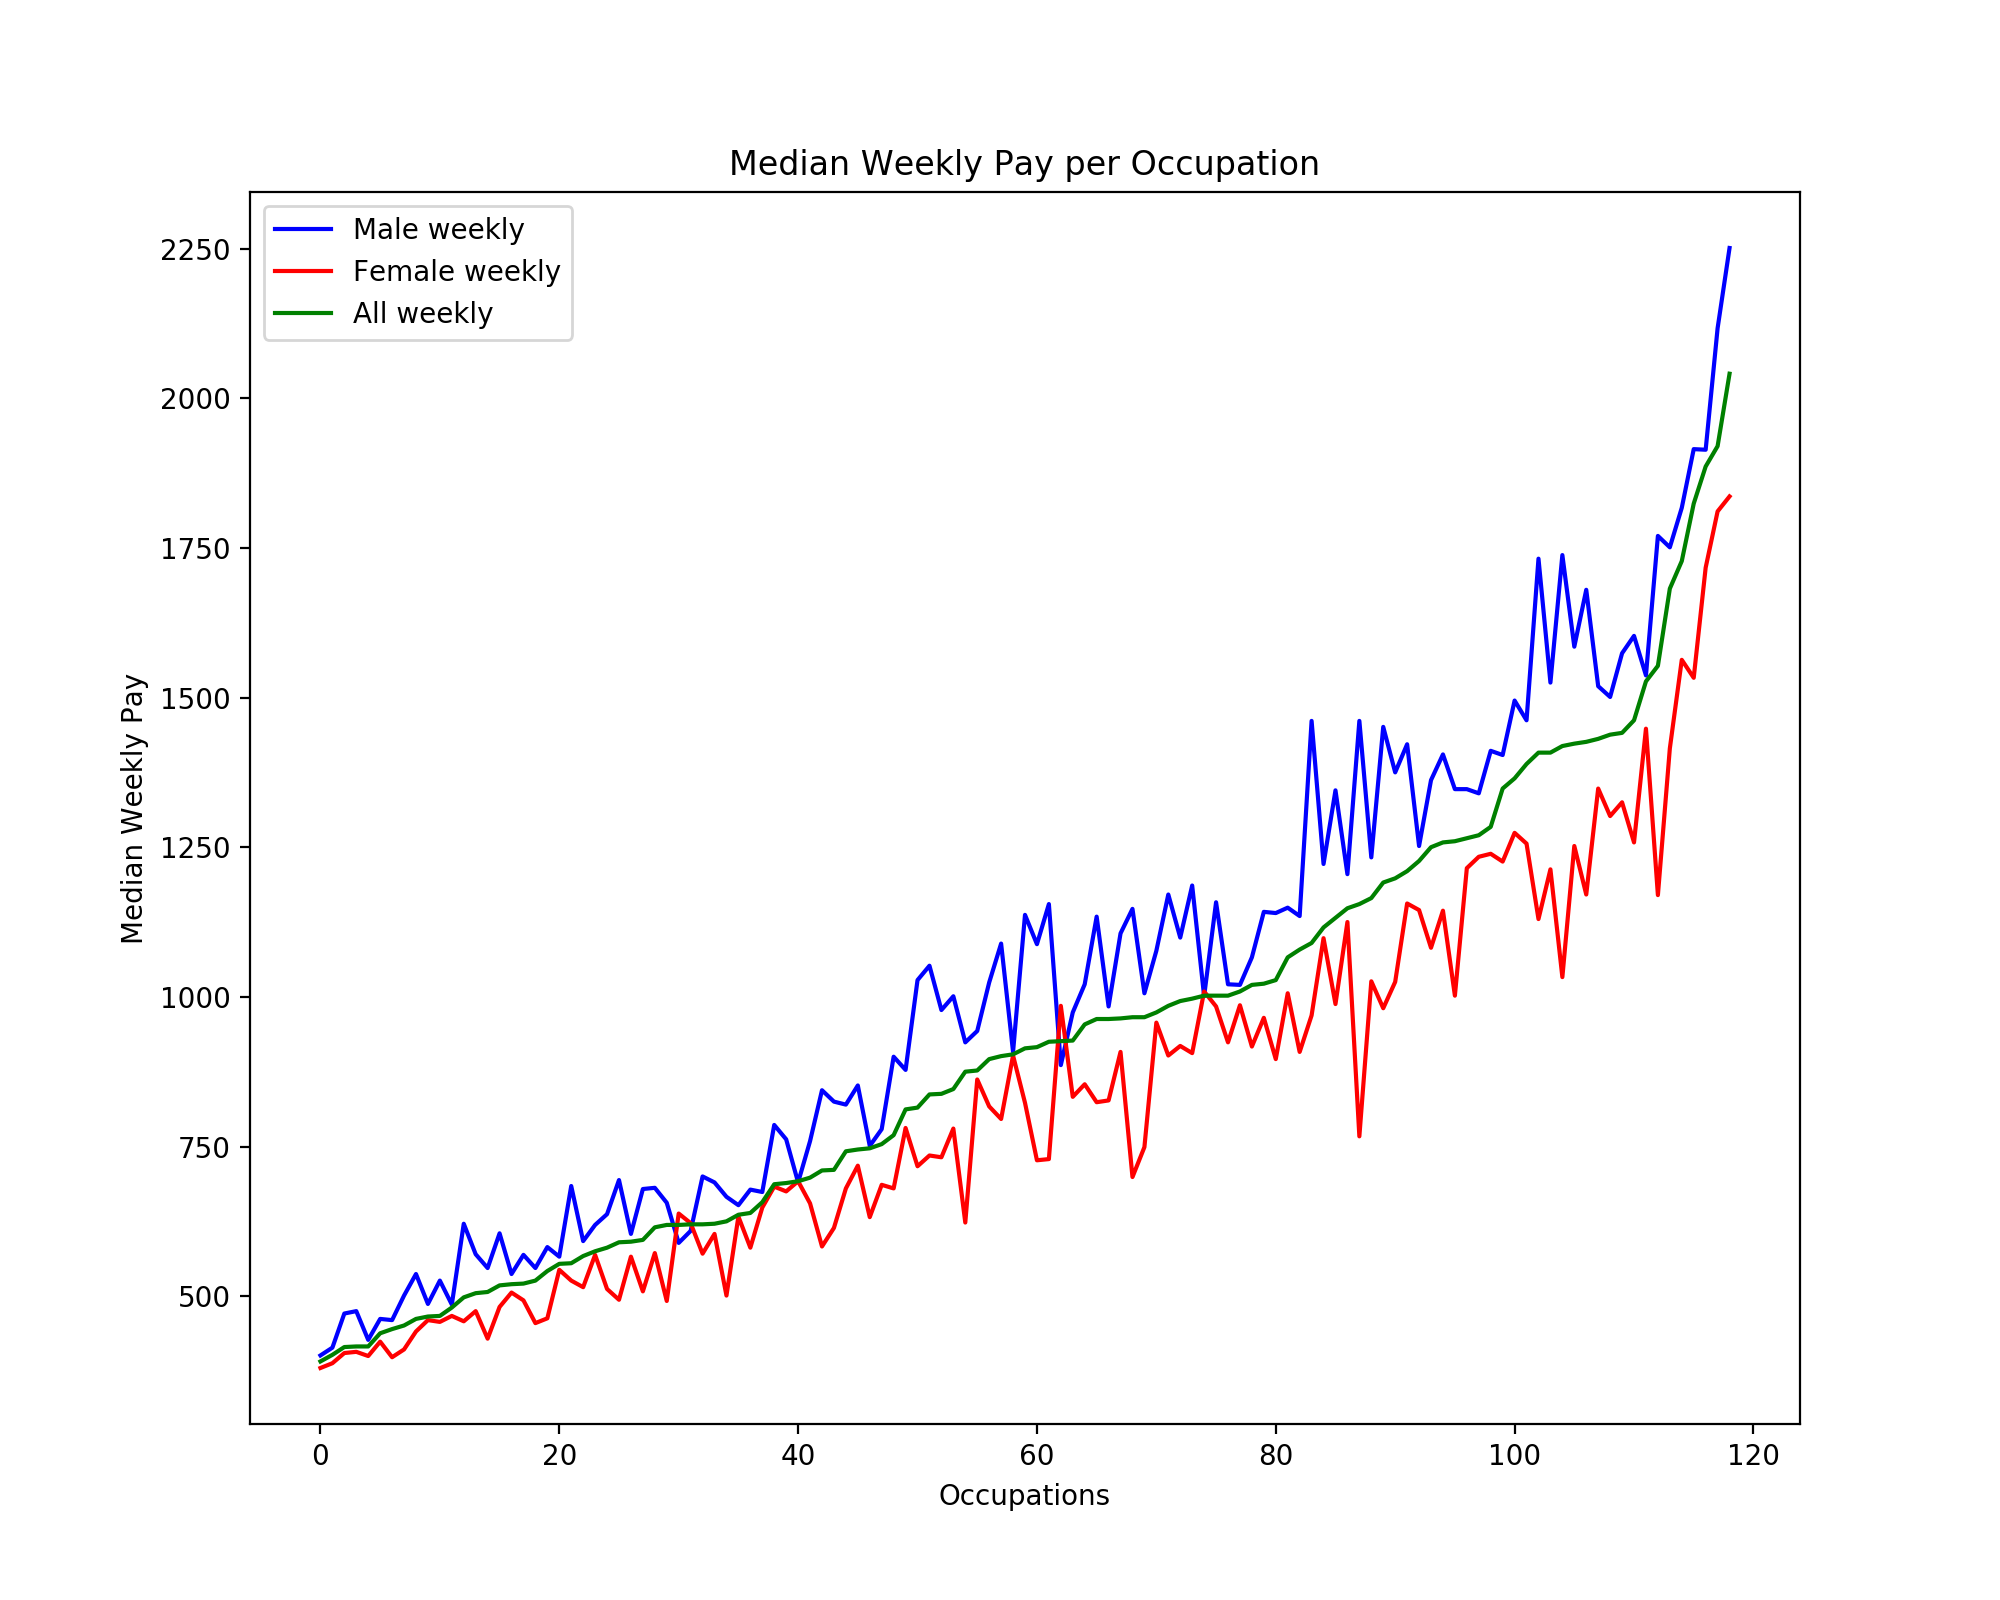

In [127]:
sort = all_wages.sort_values(by='All_weekly')
fig = plt.figure(figsize=(10, 8))
plt.title("Median Weekly Pay per Occupation")
plt.xlabel("Occupations") 
plt.ylabel("Median Weekly Pay")
plt.plot(range(len(sort["Occupation"])),sort["M_weekly"], color = "b", label="Male weekly")
plt.plot(range(len(sort["Occupation"])),sort["F_weekly"], color = 'r', label="Female weekly")
plt.plot(range(len(sort["Occupation"])),sort["All_weekly"], color = 'g', label="All weekly")
plt.legend(loc='upper left')

### Observations
As can be seen in the graph, in almost all occupations, the women's median pay is consistently lower than median pay for all workers.

#### Let's calculate how often.

In [114]:
def low(row):
    if row['All_weekly'] > row["F_weekly"]:
        return 1
    return 0
all_wages['low'] = all_wages.apply(lambda row: low(row), axis=1)
print str(round(sum(all_wages['low'])*100.0/len(all_wages), 2))+ '%'

95.8%


In [116]:
# How often is the men's pay under the median?
def low(row):
    if row['All_weekly'] > row["M_weekly"]:
        return 1
    return 0
all_wages['low'] = all_wages.apply(lambda row: low(row), axis=1)
print str(round(sum(all_wages['low'])*100.0/len(all_wages), 2))+ '%'

4.2%


### Question: Does the representation of women in the workforce correlate with the pay gap?

In [117]:
def percent_female_workers(row):
    return row['F_workers'] * 100.0 / row['All_workers']

In [118]:
all_wages['percent_f_workers'] = all_wages.apply(lambda row: percent_female_workers(row), axis=1)
percent_female = all_wages[['Occupation', 'All_workers', 'F_workers','percent_f_workers']]
sorted_worker = percent_female.sort_values(by=['percent_f_workers'])
sorted_worker.head()

,Occupation,All_workers,F_workers,percent_f_workers
528,Driver/sales workers and truck drivers,2687,105,3.907704
228,Police and sheriff's patrol officers,655,86,13.129771
96,"Engineers, all other",393,54,13.740458
550,"Laborers and freight, stock, and material move...",1433,219,15.282624
130,Clergy,376,60,15.957447


In [119]:
slope_opt = all_wages["percent_f_workers"].cov(all_wages["percentage_points"]) / all_wages["percent_f_workers"].var()
intercept_opt = all_wages["percentage_points"].mean() - slope_opt * all_wages["percent_f_workers"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

Optimal slope: -0.105970876854
Optimal intercept: 24.4844882385


<IPython.core.display.Javascript object>


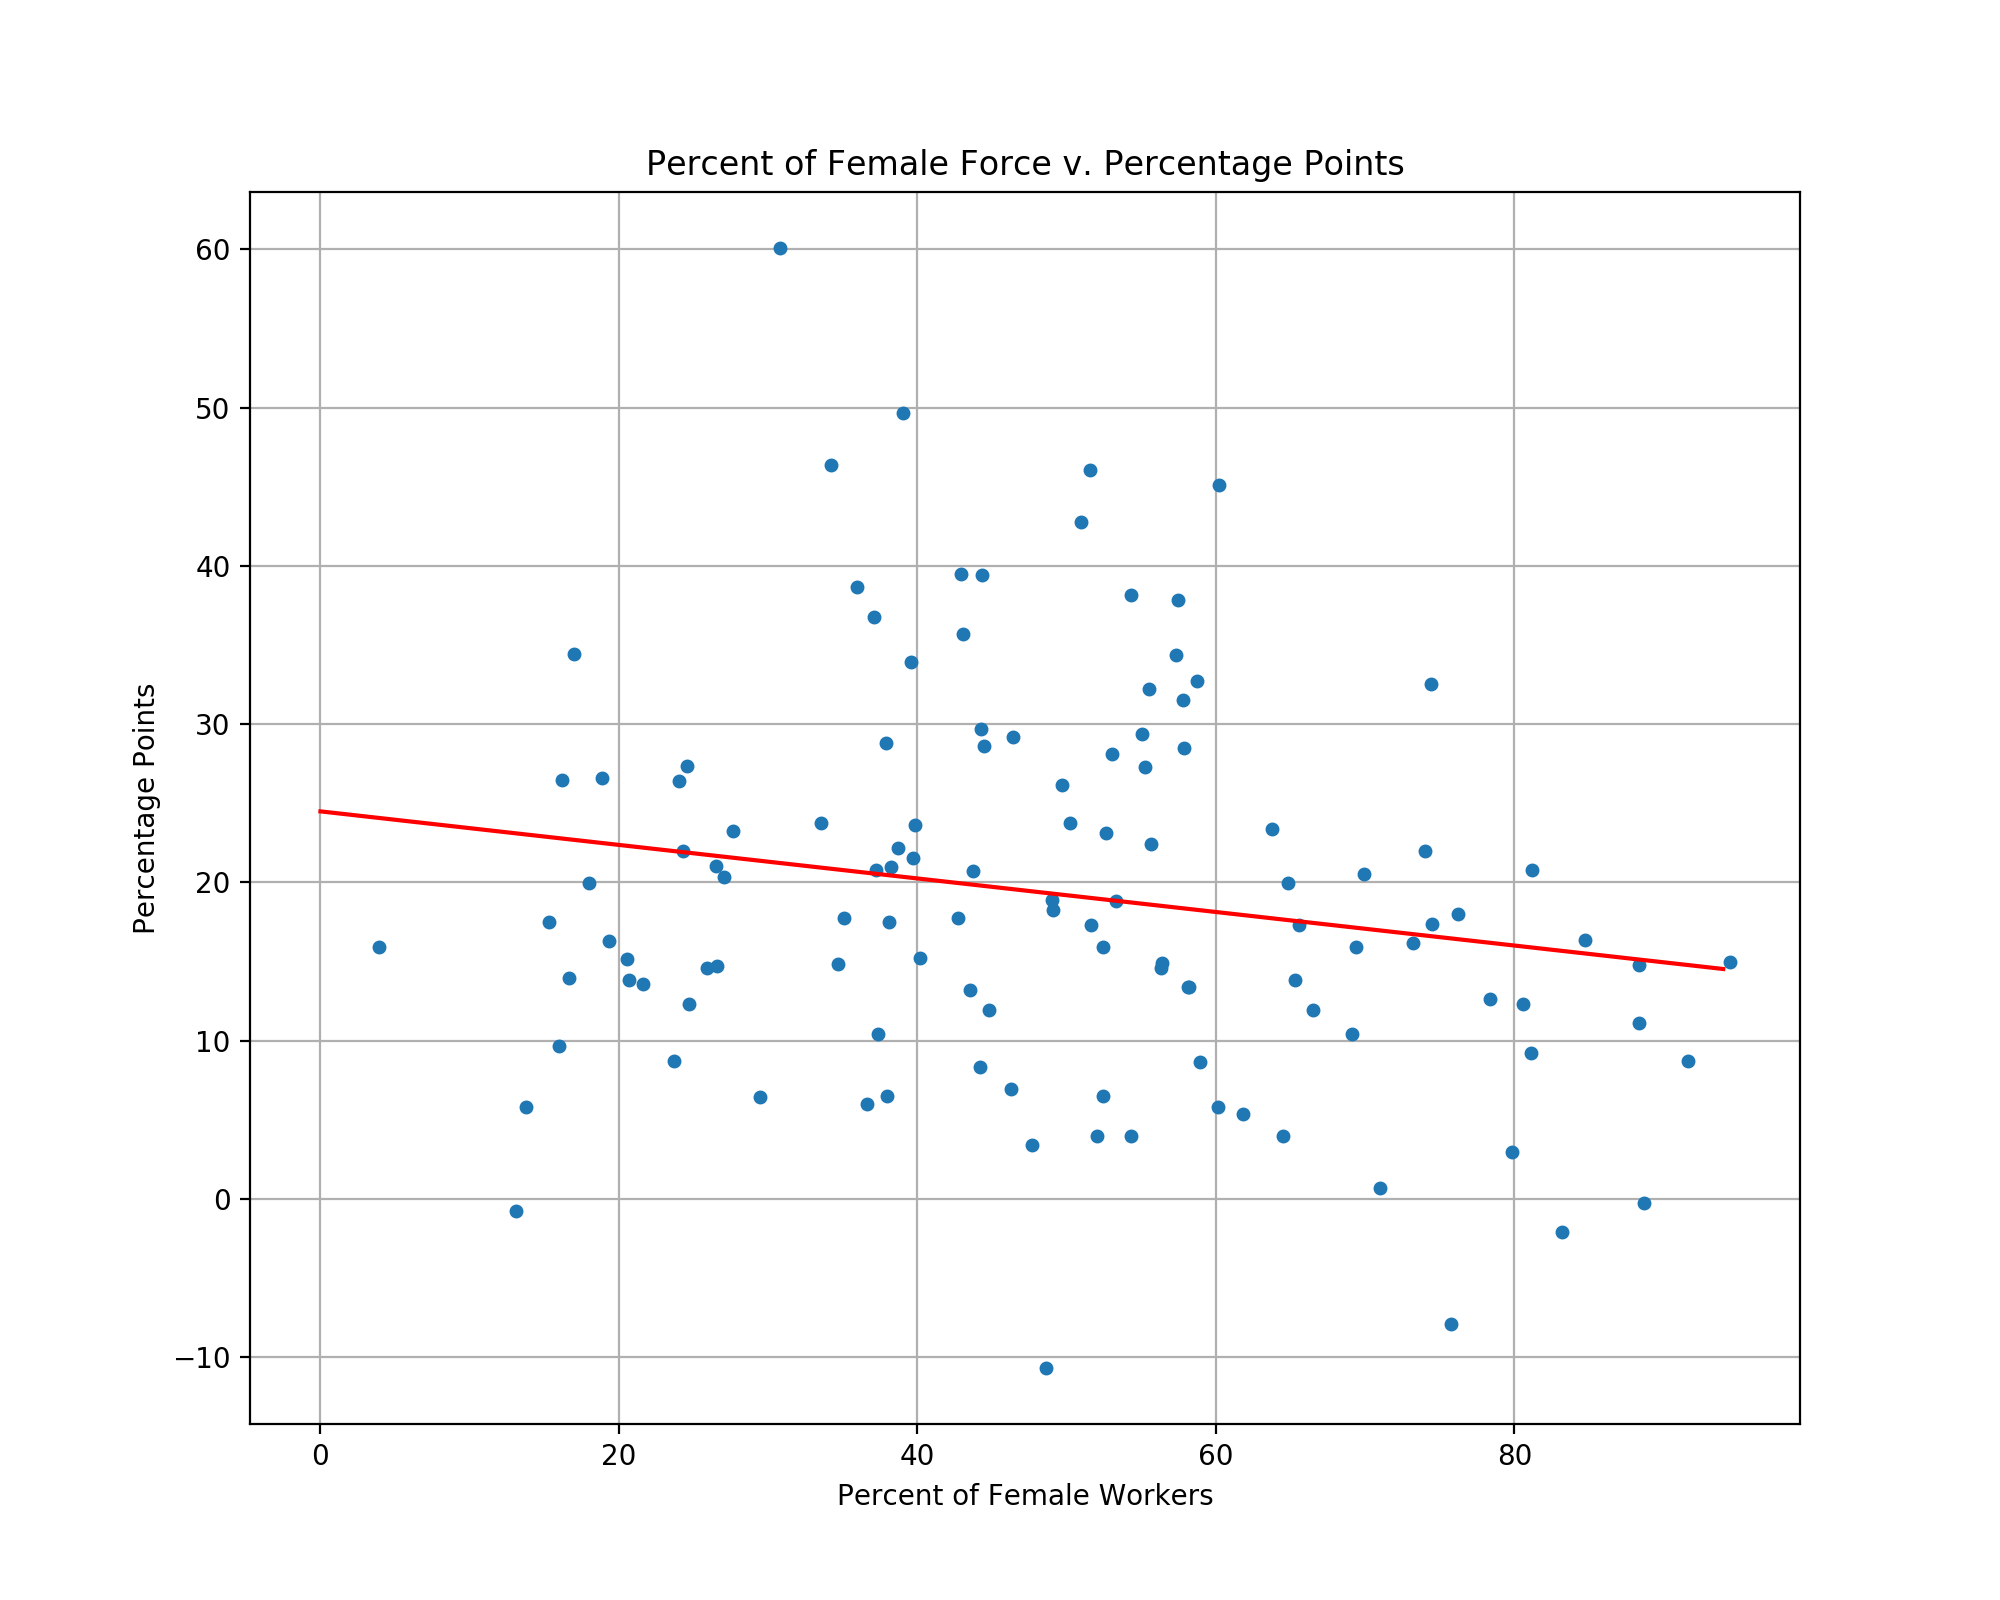

In [120]:
fig = plt.figure(figsize=(10, 8))


plt.plot(all_wages["percent_f_workers"],all_wages["percentage_points"],"o", markersize=4)
plt.xlabel("Percent of Female Workers")
plt.ylabel("Percentage Points")
plt.title("Percent of Female Force v. Percentage Points")

plt.grid()

xvals = np.arange(all_wages["percent_f_workers"].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig.canvas.draw()

To examine the strength of the relationship between the two variables, let's calculate the correlation coefficient.

In [121]:
print(np.corrcoef(all_wages["percent_f_workers"],all_wages["percentage_points"])[0,1])

-0.176320009631


In [122]:
import statsmodels.api as sm
all_wages["Constant"] = 1
m = sm.OLS(all_wages["percentage_points"], all_wages[["percent_f_workers", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      percentage_points   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.754
Date:                Wed, 20 Dec 2017   Prob (F-statistic):             0.0551
Time:                        17:00:54   Log-Likelihood:                -464.42
No. Observations:                 119   AIC:                             932.8
Df Residuals:                     117   BIC:                             938.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
percent_f_workers    -0.1060      0.055     -1.938      0.055      -0.214       0.002
Constant             24.4845      2.878      8.506      0.000      18.784      30.185
==============================================================================
Omnibus:                        6.495   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.985
Skew:                           0.506   Prob(JB):                       0.0502
Kurtosis:                       3.430   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see here that the correlation between the two variables is very low.

## Conclusion
* There is an observable pay gap for many occupations.
* It is unlikely that the pay gap is related to the representation

### Future Work

* Larger data sets
* More factors: education, race, etc.